# Airline Regression Model 

by

**Remella Satya Ramana Kumar**

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [75]:
data = pd.read_csv("S:\Airline data\BA_AirlineReviews.csv",low_memory=False)

# EDA

**Name Unnamed Column**

In [76]:
if any('Unnamed' in col for col in data.columns):
    # Rename the first unnamed column to 'New_Name'
    data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [77]:
data.head

<bound method NDFrame.head of         ID  OverallRating                              ReviewHeader  \
0        0            1.0    "Service level far worse then Ryanair"   
1        1            3.0  "do not upgrade members based on status"   
2        2            8.0             "Flight was smooth and quick"   
3        3            1.0             "Absolutely hopeless airline"   
4        4            1.0        "Customer Service is non existent"   
...    ...            ...                                       ...   
3696  3696            1.0           British Airways customer review   
3697  3697            9.0           British Airways customer review   
3698  3698            5.0           British Airways customer review   
3699  3699            4.0           British Airways customer review   
3700  3700            4.0           British Airways customer review   

                  Name            Datetime  VerifiedReview  \
0              L Keele  19th November 2023            T

In [78]:
data.axes

[RangeIndex(start=0, stop=3701, step=1),
 Index(['ID', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
        'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
        'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
        'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
        'InflightEntertainment', 'Wifi&Connectivity'],
       dtype='object')]

In [79]:
data = data.drop(['ID'],axis=1)

In [80]:
data.nunique()

OverallRating              10
ReviewHeader             2684
Name                     2906
Datetime                 1820
VerifiedReview              2
ReviewBody               3692
TypeOfTraveller             4
SeatType                    4
Route                    1590
DateFlown                 112
SeatComfort                 5
CabinStaffService           5
GroundService               5
ValueForMoney               5
Recommended                 2
Aircraft                  202
Food&Beverages              5
InflightEntertainment       5
Wifi&Connectivity           5
dtype: int64

In [81]:
data.info

<bound method DataFrame.info of       OverallRating                              ReviewHeader  \
0               1.0    "Service level far worse then Ryanair"   
1               3.0  "do not upgrade members based on status"   
2               8.0             "Flight was smooth and quick"   
3               1.0             "Absolutely hopeless airline"   
4               1.0        "Customer Service is non existent"   
...             ...                                       ...   
3696            1.0           British Airways customer review   
3697            9.0           British Airways customer review   
3698            5.0           British Airways customer review   
3699            4.0           British Airways customer review   
3700            4.0           British Airways customer review   

                  Name            Datetime  VerifiedReview  \
0              L Keele  19th November 2023            True   
1         Austin Jones  19th November 2023            True   
2

In [82]:
data = data.drop(['ReviewHeader','Name','Datetime','Aircraft','ReviewBody','Route','DateFlown'],axis=1)

In [83]:
data.columns

Index(['OverallRating', 'VerifiedReview', 'TypeOfTraveller', 'SeatType',
       'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
       'Recommended', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity'],
      dtype='object')

In [84]:
data = data.drop(['VerifiedReview'],axis=1)

In [85]:
data.axes

[RangeIndex(start=0, stop=3701, step=1),
 Index(['OverallRating', 'TypeOfTraveller', 'SeatType', 'SeatComfort',
        'CabinStaffService', 'GroundService', 'ValueForMoney', 'Recommended',
        'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity'],
       dtype='object')]

In [86]:
c= data.isnull().sum()
i = len(data.index)
null_data = round(100*(c/i), 2)
null_data[ null_data > 0 ]

OverallRating             0.14
TypeOfTraveller          20.83
SeatType                  0.05
SeatComfort               3.13
CabinStaffService         3.43
GroundService            22.86
ValueForMoney             0.03
Food&Beverages           10.43
InflightEntertainment    31.07
Wifi&Connectivity        83.54
dtype: float64

In [87]:
data.OverallRating = data.OverallRating.fillna(data.OverallRating.median())
data.SeatComfort = data.SeatComfort.fillna(data.SeatComfort.median()) 
data.ValueForMoney = data.ValueForMoney.fillna(data.ValueForMoney.median())
data.SeatType = data.SeatType.fillna('NA')
data.TypeOfTraveller = data.TypeOfTraveller.fillna('NA')
data.InflightEntertainment = data.InflightEntertainment.fillna(data.InflightEntertainment.median())

In [88]:
data.rename(columns={'Food&Beverages':'Food'}, inplace=True)

In [89]:
c= data.isnull().sum()
i = len(data.index)
null_data= round(100*(c/i),2)
null_data[ null_data > 0 ]

CabinStaffService     3.43
GroundService        22.86
Food                 10.43
Wifi&Connectivity    83.54
dtype: float64

In [90]:
data.GroundService = data.GroundService.fillna(data.GroundService.median())
data.CabinStaffService = data.CabinStaffService.fillna(data.CabinStaffService.median())
data.Food  = data.Food.fillna(data.Food.median())

In [91]:
data.Recommended = data.Recommended.map({'yes':1, 'no':1})

In [92]:
data = data.drop(['Wifi&Connectivity'],axis=1)

In [93]:
c= data.isnull().sum()
i = len(data.index)
null_data= round(100*(c/i),2)
null_data[ null_data > 0 ]

Series([], dtype: float64)

In [94]:
data.dtypes

OverallRating            float64
TypeOfTraveller           object
SeatType                  object
SeatComfort              float64
CabinStaffService        float64
GroundService            float64
ValueForMoney            float64
Recommended                int64
Food                     float64
InflightEntertainment    float64
dtype: object

In [95]:
data = pd.get_dummies(data = data , columns = [ 'TypeOfTraveller', 'SeatType', 'SeatComfort','Food','InflightEntertainment'],drop_first=True)

In [96]:
data.axes

[RangeIndex(start=0, stop=3701, step=1),
 Index(['OverallRating', 'CabinStaffService', 'GroundService', 'ValueForMoney',
        'Recommended', 'TypeOfTraveller_Couple Leisure',
        'TypeOfTraveller_Family Leisure', 'TypeOfTraveller_NA',
        'TypeOfTraveller_Solo Leisure', 'SeatType_Economy Class',
        'SeatType_First Class', 'SeatType_NA', 'SeatType_Premium Economy',
        'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
        'SeatComfort_5.0', 'Food_2.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
        'InflightEntertainment_2.0', 'InflightEntertainment_3.0',
        'InflightEntertainment_4.0', 'InflightEntertainment_5.0'],
       dtype='object')]

In [97]:
data.shape

(3701, 25)

In [98]:
numeric_vars = data.select_dtypes(include=["int64","float64"])

In [99]:
numeric_vars.axes

[RangeIndex(start=0, stop=3701, step=1),
 Index(['OverallRating', 'CabinStaffService', 'GroundService', 'ValueForMoney',
        'Recommended'],
       dtype='object')]

# Regression analysis

**The target Variable is Overall rating**

In [100]:
y= data.pop('OverallRating')

In [101]:
X= data

In [102]:
print(y)

0       1.0
1       3.0
2       8.0
3       1.0
4       1.0
       ... 
3696    1.0
3697    9.0
3698    5.0
3699    4.0
3700    4.0
Name: OverallRating, Length: 3701, dtype: float64


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7 ,test_size=0.3, random_state=100)

In [104]:
X_train.shape

(2590, 24)

In [105]:
X_test.shape

(1111, 24)

In [106]:
var = ['CabinStaffService', 'GroundService', 'ValueForMoney',
        'Recommended']

scaler = MinMaxScaler()

#Fit and transform training set only
X_train[var] = scaler.fit_transform(X_train[var])

In [107]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)

# RFE 

rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [108]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('CabinStaffService', True, 1),
 ('GroundService', True, 1),
 ('ValueForMoney', True, 1),
 ('Recommended', False, 13),
 ('TypeOfTraveller_Couple Leisure', False, 9),
 ('TypeOfTraveller_Family Leisure', False, 8),
 ('TypeOfTraveller_NA', False, 2),
 ('TypeOfTraveller_Solo Leisure', False, 7),
 ('SeatType_Economy Class', False, 3),
 ('SeatType_First Class', False, 11),
 ('SeatType_NA', True, 1),
 ('SeatType_Premium Economy', False, 12),
 ('SeatComfort_2.0', True, 1),
 ('SeatComfort_3.0', True, 1),
 ('SeatComfort_4.0', True, 1),
 ('SeatComfort_5.0', True, 1),
 ('Food_2.0', False, 6),
 ('Food_3.0', True, 1),
 ('Food_4.0', True, 1),
 ('Food_5.0', True, 1),
 ('InflightEntertainment_2.0', False, 10),
 ('InflightEntertainment_3.0', False, 5),
 ('InflightEntertainment_4.0', False, 4),
 ('InflightEntertainment_5.0', True, 1)]

In [109]:
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [110]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [111]:
X_train.columns[rfe.support_]

Index(['CabinStaffService', 'GroundService', 'ValueForMoney', 'SeatType_NA',
       'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
       'SeatComfort_5.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
       'InflightEntertainment_5.0'],
      dtype='object')

In [112]:
cols = ['CabinStaffService', 'GroundService', 'ValueForMoney', 'SeatType_NA',
       'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
       'SeatComfort_5.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
       'InflightEntertainment_5.0']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:          OverallRating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:43:58   Log-Likelihood:                -4249.7
No. Observations:                2590   AIC:                             8525.
Df Residuals:                    2577   BIC:                             8602.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**SeatType_NA**

In [113]:
cols = ['CabinStaffService', 'GroundService', 'ValueForMoney', 
       'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
       'SeatComfort_5.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
       'InflightEntertainment_5.0']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:          OverallRating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1247.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:43:58   Log-Likelihood:                -4250.1
No. Observations:                2590   AIC:                             8524.
Df Residuals:                    2578   BIC:                             8594.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Automatic Regression**

In [114]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [115]:
cols = ['CabinStaffService', 'GroundService', 'ValueForMoney', 
       'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
       'SeatComfort_5.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
       'InflightEntertainment_5.0']

lr = build_model_sk(X_train[cols],y_train)

In [116]:
print(lr.coef_)

[1.27198323 1.50019147 4.11058114 0.24705487 0.35490676 1.12510076
 1.44563818 0.18397896 0.85226141 1.12778849 0.20897232]


In [117]:
print(lr.intercept_)

0.6466401584646526


## Analysis

**Y Train predicted Analysis**

In [118]:
y_train_pred = lr.predict(X_train[cols])

**We can draw the error Terms**

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

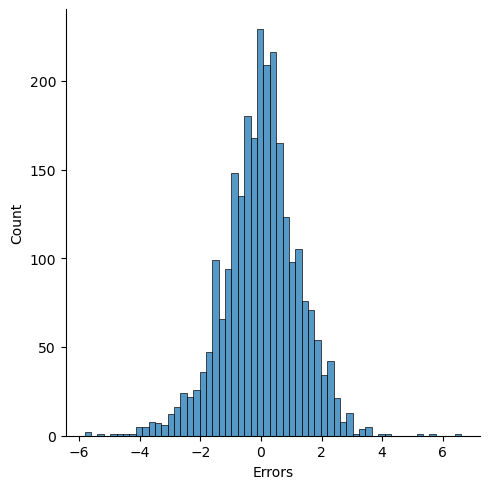

In [119]:
fig = plt.figure()
sns.displot(y_train - y_train_pred)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

Text(0.5, 0, 'Errors')

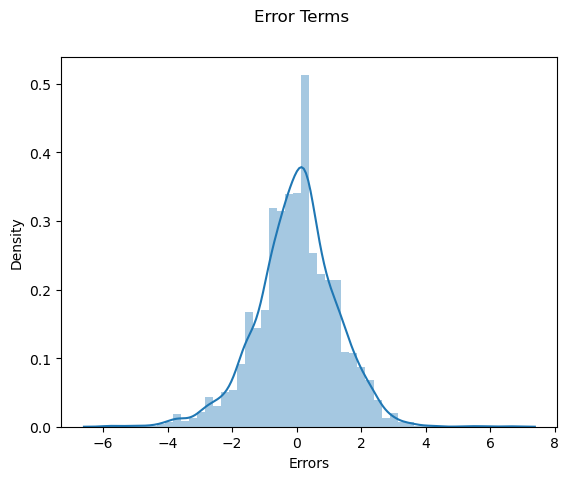

In [120]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(y_train - y_train_pred)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

## R-Squared y_train

In [121]:
r2_score(y_train,y_train_pred)

0.8418349243598136

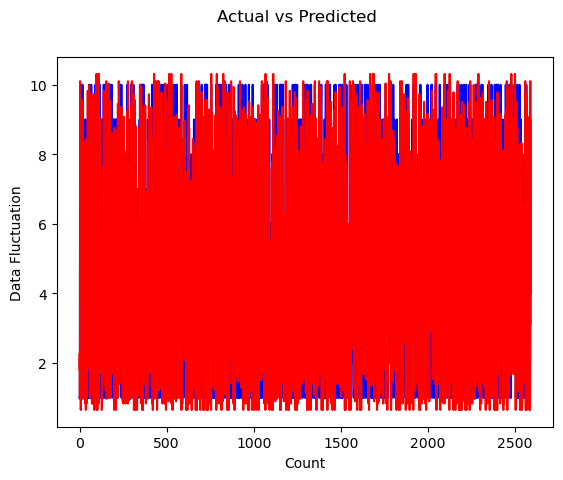

In [122]:
n = [i for i in range(0,len(X_train),1)]
plt.plot(n,y_train, color="blue")
plt.plot(n,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Count')
plt.ylabel('Data Fluctuation')
plt.show()

Text(0, 0.5, 'y_train_pred')

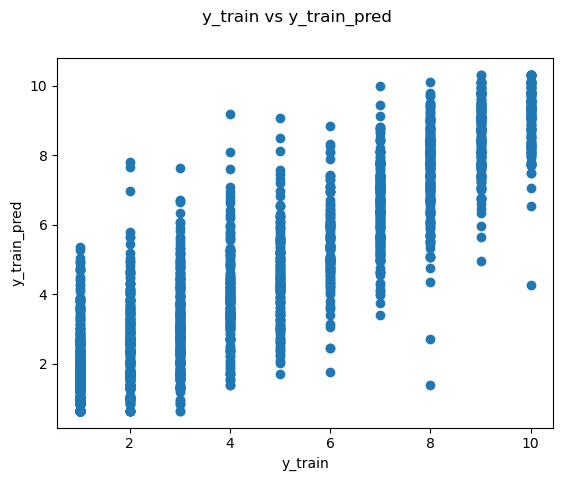

In [123]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred')          
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

In [124]:
#Scale variables in X_test
var = ['CabinStaffService', 'GroundService', 'ValueForMoney',
        'Recommended']

#Test data to be transformed only, no fitting
X_test[var] = scaler.transform(X_test[var])

In [125]:
#Columns from our final model
cols = ['CabinStaffService', 'GroundService', 'ValueForMoney', 
       'SeatComfort_2.0', 'SeatComfort_3.0', 'SeatComfort_4.0',
       'SeatComfort_5.0', 'Food_3.0', 'Food_4.0', 'Food_5.0',
       'InflightEntertainment_5.0']

#Predict the values for test data
y_pred = lr.predict(X_test[cols])

In [128]:
r2_score(y_test,y_pred)

0.8342088973804859

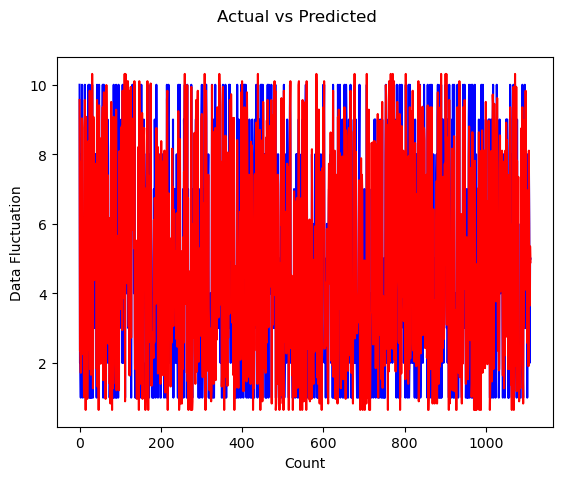

In [129]:
n = [i for i in range(0,len(X_test),1)]
plt.plot(n,y_test, color="blue")
plt.plot(n,y_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Count')
plt.ylabel('Data Fluctuation')
plt.show()

Text(0, 0.5, 'y_pred')

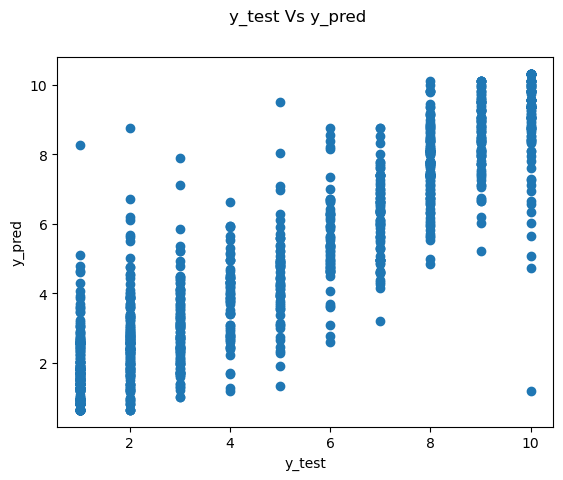

In [130]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test Vs y_pred')          
plt.xlabel('y_test')                         
plt.ylabel('y_pred')

# Conclusions 

### To have a great response from a passenger for any flight the Cabinet Service, Ground Service, Food in Flight  , , InFlight Entertainment and Seat Comfort are very important

**End**